In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pharma-sales-data/salesdaily.csv
/kaggle/input/pharma-sales-data/salesweekly.csv
/kaggle/input/pharma-sales-data/salesmonthly.csv
/kaggle/input/pharma-sales-data/saleshourly.csv


In [2]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, roc_curve, auc, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

2024-04-11 16:21:15.613775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 16:21:15.613999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 16:21:15.828136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading data

In [3]:
salesdaily=pd.read_csv('/kaggle/input/pharma-sales-data/salesdaily.csv')

In [4]:
salesdaily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [5]:
salesdaily.isnull().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [6]:
salesdaily.shape

(2106, 13)

In [7]:
salesdaily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [8]:
salesdaily['datum'] = pd.to_datetime(salesdaily['datum'])

In [9]:
print('Min date from dataset set: %s' % salesdaily['datum'].min().date())
print('Max date from dataset set: %s' % salesdaily['datum'].max().date())

Min date from dataset set: 2014-01-02
Max date from dataset set: 2019-10-08


In [10]:
# import plotly.express as px
# # Plot the quantity of M01AB against the datum using Plotly Express
# fig = px.line(salesdaily, x='datum', y='M01AB', title='Quantity of M01AB over time')
# fig.show()

In [11]:
# fig = px.line(salesdaily, x='datum', y='M01AE', title='Quantity of M01AE over time')
# fig.show()

In [12]:
# fig = px.line(salesdaily, x='datum', y='N02BA', title='Quantity of N02BA over time')
# fig.show()

In [13]:
# fig = px.line(salesdaily, x='datum', y='N02BE', title='Quantity of N02BE over time')
# fig.show()

In [14]:
# fig = px.line(salesdaily, x='datum', y='N05B', title='Quantity of N05B over time')
# fig.show()

In [15]:
# fig = px.line(salesdaily, x='datum', y='N05C', title='Quantity of N05C over time')
# fig.show()

In [16]:
# fig = px.line(salesdaily, x='datum', y='R03', title='Quantity of R03 over time')
# fig.show()

In [17]:
# fig = px.line(salesdaily, x='datum', y='R06', title='Quantity of R06 over time')
# fig.show()

In [18]:
# df_m01ab = salesdaily[['M01AB','Year','Month']]
# df_m01ab

In [19]:
# df_m01ab = df_m01ab.groupby(['Year', 'Month']).sum().reset_index()
# df_m01ab

In [20]:
# # Plot the 'M01AB' values against month and year
# fig = px.bar(df_m01ab, x='Month', y='M01AB', color='Year', barmode='group')

# # Update the axis labels and title
# fig.update_layout(
#     xaxis_title='Month',
#     yaxis_title='M01AB',
#     title='M01AB vs Month and Year'
# )

# # Show the plot
# fig.show()

In [21]:
# # Convert Year and Month columns to datetime format
# df_m01ab['Date'] = pd.to_datetime(df_m01ab[['Year', 'Month']].assign(day=1))

# # Plot M01AB vs date
# fig = px.line(df_m01ab, x='Date', y='M01AB', title='M01AB vs Date')
# fig.update_xaxes(title_text='Date')
# fig.update_yaxes(title_text='M01AB')

# # Show the plot
# fig.show()

In [22]:
salesdaily['day'] = salesdaily['datum'].dt.day

## Predictive data analysis

In [23]:
# Reshape the dataframe
salesdaily_new = salesdaily.melt(id_vars=['datum', 'Year', 'Month', 'Hour', 'Weekday Name', 'day'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
salesdaily_new.head()

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,Thursday,2,M01AB,0.0
1,2014-01-03,2014,1,276,Friday,3,M01AB,8.0
2,2014-01-04,2014,1,276,Saturday,4,M01AB,2.0
3,2014-01-05,2014,1,276,Sunday,5,M01AB,4.0
4,2014-01-06,2014,1,276,Monday,6,M01AB,5.0


In [24]:
salesdaily_new.shape

(16848, 8)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #feature scaling

In [26]:
salesdaily_new['Weekday Name'] = le.fit_transform(salesdaily_new['Weekday Name'])
salesdaily_new['Drug'] = le.fit_transform(salesdaily_new['Drug'])
salesdaily_new

#4-thursday
#0-friday
#2-sat
#3-sun
#1-mon
#5-tue 
#6-wed

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,4,2,0,0.00
1,2014-01-03,2014,1,276,0,3,0,8.00
2,2014-01-04,2014,1,276,2,4,0,2.00
3,2014-01-05,2014,1,276,3,5,0,4.00
4,2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...,...
16843,2019-10-04,2019,10,276,0,4,7,1.00
16844,2019-10-05,2019,10,276,2,5,7,0.33
16845,2019-10-06,2019,10,276,3,6,7,4.20
16846,2019-10-07,2019,10,276,1,7,7,1.00


In [27]:
# salesdaily.set_index('datum')

In [28]:
# salesdaily_new= salesdaily_new.set_index(['datum'], drop=True)
# salesdaily_new.head()

In [29]:
# data=pd.date_range(start='')

### Train test split

In [30]:
train = salesdaily_new[salesdaily_new['Year'] < 2019]
test = salesdaily_new[salesdaily_new['Year'] >= 2019]


In [31]:
train

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,4,2,0,0.0
1,2014-01-03,2014,1,276,0,3,0,8.0
2,2014-01-04,2014,1,276,2,4,0,2.0
3,2014-01-05,2014,1,276,3,5,0,4.0
4,2014-01-06,2014,1,276,1,6,0,5.0
...,...,...,...,...,...,...,...,...
16562,2018-12-27,2018,12,276,4,27,7,0.0
16563,2018-12-28,2018,12,276,0,28,7,0.0
16564,2018-12-29,2018,12,276,2,29,7,2.0
16565,2018-12-30,2018,12,276,3,30,7,3.3


### Time period of the train dataset

In [32]:
print('Min date from train set: %s' % train['datum'].min().date())
print('Max date from train set: %s' % train['datum'].max().date())

Min date from train set: 2014-01-02
Max date from train set: 2018-12-31


In [33]:
train.columns

Index(['datum', 'Year', 'Month', 'Hour', 'Weekday Name', 'day', 'Drug',
       'Quantity'],
      dtype='object')

In [34]:
train.drop(columns=['Year','Hour','Month','Weekday Name','day'], inplace=True)
test.drop(columns=['Year','Hour','Month','Weekday Name','day'], inplace=True)

In [35]:
test

,datum,Drug,Quantity
1825,2019-01-01,0,0.00
1826,2019-01-02,0,5.33
1827,2019-01-03,0,4.33
1828,2019-01-04,0,7.00
1829,2019-01-05,0,8.01
...,...,...,...
16843,2019-10-04,7,1.00
16844,2019-10-05,7,0.33
16845,2019-10-06,7,4.20
16846,2019-10-07,7,1.00


In [36]:
train

,datum,Drug,Quantity
0,2014-01-02,0,0.0
1,2014-01-03,0,8.0
2,2014-01-04,0,2.0
3,2014-01-05,0,4.0
4,2014-01-06,0,5.0
...,...,...,...
16562,2018-12-27,7,0.0
16563,2018-12-28,7,0.0
16564,2018-12-29,7,2.0
16565,2018-12-30,7,3.3


In [37]:
lag_size = (test['datum'].max().date() - train['datum'].max().date()).days
print('Max date from train set: %s' % train['datum'].max().date())
print('Max date from test set: %s' % test['datum'].max().date())
print('Forecast lag size', lag_size)

Max date from train set: 2018-12-31
Max date from test set: 2019-10-08
Forecast lag size 281


### Basic EDA

In [38]:
daily_sales = train.groupby('datum', as_index=False)['Quantity'].sum()
item_daily_sales = train.groupby(['Drug', 'datum'], as_index=False)['Quantity'].sum()

In [39]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
daily_sales_sc = go.Scatter(x=daily_sales['datum'], y=daily_sales['Quantity'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Datum'), yaxis=dict(title='Quantity'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

In [40]:
item_daily_sales_sc = []
for item in item_daily_sales['Drug'].unique():
    current_item_daily_sales = item_daily_sales[(item_daily_sales['Drug'] == item)]
    item_daily_sales_sc.append(go.Scatter(x=current_item_daily_sales['datum'], y=current_item_daily_sales['Quantity'], name=('Drug %s' % item)))

layout = go.Layout(title='Quantity daily sales', xaxis=dict(title='date'), yaxis=dict(title='Quantity'))
fig = go.Figure(data=item_daily_sales_sc, layout=layout)
iplot(fig)

SuB-sample train set to get only the last year of data and reduce training time

In [41]:
train = train[(train['datum'] >= '2018-01-01')]

### Rearrange dataset so we can apply shift methods

In [42]:
train_gp = train.sort_values('datum').groupby(['Drug', 'datum'], as_index=False)
train_gp = train_gp.agg({'Quantity':['mean']})
train_gp.columns = ['Drug', 'datum', 'Quantity']
train_gp.head()

,Drug,datum,Quantity
0,0,2018-01-01,0.00
1,0,2018-01-02,1.00
2,0,2018-01-03,4.67
3,0,2018-01-04,6.00
4,0,2018-01-05,12.00


## Transform the data into a time series problem 

In [43]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [44]:
window = 29
lag = lag_size
series = series_to_supervised(train_gp.drop('datum', axis=1), window=window, lag=lag)
series.head()

,Drug(t-29),Quantity(t-29),Drug(t-28),Quantity(t-28),Drug(t-27),Quantity(t-27),Drug(t-26),Quantity(t-26),Drug(t-25),Quantity(t-25),...,Drug(t-3),Quantity(t-3),Drug(t-2),Quantity(t-2),Drug(t-1),Quantity(t-1),Drug(t),Quantity(t),Drug(t+281),Quantity(t+281)
29,0.0,0.00,0.0,1.00,0.0,4.67,0.0,6.00,0.0,12.00,...,0.0,3.34,0.0,1.50,0.0,2.33,0,4.33,0.0,7.00
30,0.0,1.00,0.0,4.67,0.0,6.00,0.0,12.00,0.0,4.66,...,0.0,1.50,0.0,2.33,0.0,4.33,0,0.33,0.0,3.00
31,0.0,4.67,0.0,6.00,0.0,12.00,0.0,4.66,0.0,0.00,...,0.0,2.33,0.0,4.33,0.0,0.33,0,5.34,0.0,5.00
32,0.0,6.00,0.0,12.00,0.0,4.66,0.0,0.00,0.0,2.33,...,0.0,4.33,0.0,0.33,0.0,5.34,0,2.33,0.0,4.33
33,0.0,12.00,0.0,4.66,0.0,0.00,0.0,2.33,0.0,5.33,...,0.0,0.33,0.0,5.34,0.0,2.33,0,4.33,0.0,11.00


In [45]:
last_item = 'Drug(t-%d)' % window
series = series[(series['Drug(t)'] == series[last_item])]

### Remove unwanted columns

In [46]:
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['Drug']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['Drug']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['Drug(t)'], axis=1, inplace=True)

### Train/validation split

In [47]:
# Label
labels_col = 'Quantity(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train.head()

Train set shape (1444, 30)
Validation set shape (963, 30)


,Quantity(t-29),Quantity(t-28),Quantity(t-27),Quantity(t-26),Quantity(t-25),Quantity(t-24),Quantity(t-23),Quantity(t-22),Quantity(t-21),Quantity(t-20),...,Quantity(t-9),Quantity(t-8),Quantity(t-7),Quantity(t-6),Quantity(t-5),Quantity(t-4),Quantity(t-3),Quantity(t-2),Quantity(t-1),Quantity(t)
1031,2.00,1.000,3.500,3.000,2.000,1.10,3.200,2.00,3.000,1.000,...,2.000,1.00,3.30,0.450,5.000,3.00,4.60,2.200,1.600,2.350
466,2.34,2.132,3.066,1.660,2.929,1.00,3.670,2.00,3.670,5.396,...,2.529,5.20,3.67,3.000,4.506,0.00,3.00,3.067,3.010,4.759
492,3.00,3.067,3.010,4.759,2.033,3.68,2.759,6.02,1.406,0.540,...,6.000,6.66,0.00,3.526,1.779,2.93,3.34,10.660,0.033,5.840
2102,0.00,0.000,0.000,0.000,3.000,0.00,0.000,2.00,0.000,0.000,...,1.000,0.00,0.00,0.000,1.000,0.00,0.00,2.000,1.000,0.000
248,4.33,2.670,6.000,4.000,10.990,3.33,1.330,8.34,3.330,2.330,...,2.000,6.67,2.33,4.340,2.340,6.68,1.00,4.000,6.500,6.660


## MLP for time series forecasting

First we will use a Multilayer Perceptron model or MLP model, here our model will have input features equal to the window size.
The thing with MLP models is that the model don't take the input as sequenced data, so for the model, it is just receiving inputs and don't treat them as sequenced data, that may be a problem since the model won't see the data with the sequence patter that it has.

**Input shape [samples, timesteps].**

In [48]:
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

In [49]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=adam)
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
mlp_history = model_mlp.fit(X_train.values, Y_train, validation_data=(X_valid.values, Y_valid), epochs=epochs, verbose=2)

Epoch 1/40
46/46 - 1s - 29ms/step - loss: 176.6022 - val_loss: 147.2369
Epoch 2/40
46/46 - 0s - 9ms/step - loss: 178.2333 - val_loss: 144.1250
Epoch 3/40
46/46 - 0s - 6ms/step - loss: 165.5995 - val_loss: 138.3858
Epoch 4/40
46/46 - 0s - 7ms/step - loss: 178.2974 - val_loss: 135.4303
Epoch 5/40
46/46 - 0s - 6ms/step - loss: 163.5602 - val_loss: 134.1455
Epoch 6/40
46/46 - 0s - 7ms/step - loss: 158.2290 - val_loss: 134.3013
Epoch 7/40
46/46 - 0s - 3ms/step - loss: 154.3366 - val_loss: 131.9314
Epoch 8/40
46/46 - 0s - 8ms/step - loss: 153.3658 - val_loss: 130.0151
Epoch 9/40
46/46 - 0s - 6ms/step - loss: 151.9098 - val_loss: 128.9942
Epoch 10/40
46/46 - 0s - 6ms/step - loss: 150.6890 - val_loss: 128.2390
Epoch 11/40
46/46 - 0s - 6ms/step - loss: 149.0352 - val_loss: 128.9933
Epoch 12/40
46/46 - 0s - 7ms/step - loss: 147.8294 - val_loss: 126.8670
Epoch 13/40
46/46 - 0s - 7ms/step - loss: 160.1329 - val_loss: 127.5490
Epoch 14/40
46/46 - 0s - 7ms/step - loss: 146.5450 - val_loss: 125.7596


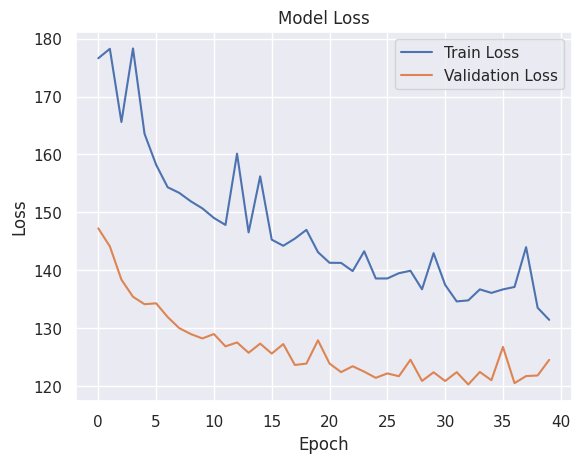

In [51]:
# Plot training and validation loss
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## CNN model
For the CNN model we will use one convolutional hidden layer followed by a max pooling layer. The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction.
The convolutional layer should be able to identify patterns between the timesteps.

**Input shape [samples, timesteps, features].**

### Data preprocess

Reshape from [samples, timesteps] into [samples, timesteps, features].
This same reshaped data will be used on the CNN model.

In [52]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (1444, 30, 1)
Validation set shape (963, 30, 1)


In [53]:
# 1
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

optimizer = Adam()

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=optimizer,  metrics = ['accuracy'])
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        44,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,093 (176.14 KB)

 Trainable params: 45,093 (176.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
46/46 - 2s - 43ms/step - accuracy: 0.0741 - loss: 166.6596 - val_accuracy: 0.0789 - val_loss: 129.4602
Epoch 2/40
46/46 - 0s - 5ms/step - accuracy: 0.0686 - loss: 153.5205 - val_accuracy: 0.0768 - val_loss: 124.9324
Epoch 3/40
46/46 - 0s - 7ms/step - accuracy: 0.0686 - loss: 148.5140 - val_accuracy: 0.0768 - val_loss: 120.3156
Epoch 4/40
46/46 - 0s - 6ms/step - accuracy: 0.0686 - loss: 155.2305 - val_accuracy: 0.0768 - val_loss: 111.3665
Epoch 5/40
46/46 - 0s - 6ms/step - accuracy: 0.0686 - loss: 136.5326 - val_accuracy: 0.0768 - val_loss: 106.2074
Epoch 6/40
46/46 - 0s - 5ms/step - accuracy: 0.0686 - loss: 125.8475 - val_accuracy: 0.0768 - val_loss: 102.8167
Epoch 7/40
46/46 - 0s - 7ms/step - accuracy: 0.0686 - loss: 123.7993 - val_accuracy: 0.0768 - val_loss: 100.3305
Epoch 8/40
46/46 - 0s - 6ms/step - accuracy: 0.0679 - loss: 120.9330 - val_accuracy: 0.0768 - val_loss: 98.9819
Epoch 9/40
46/46 - 0s - 6ms/step - accuracy: 0.0686 - loss: 119.3400 - val_accuracy: 0.0768 - va

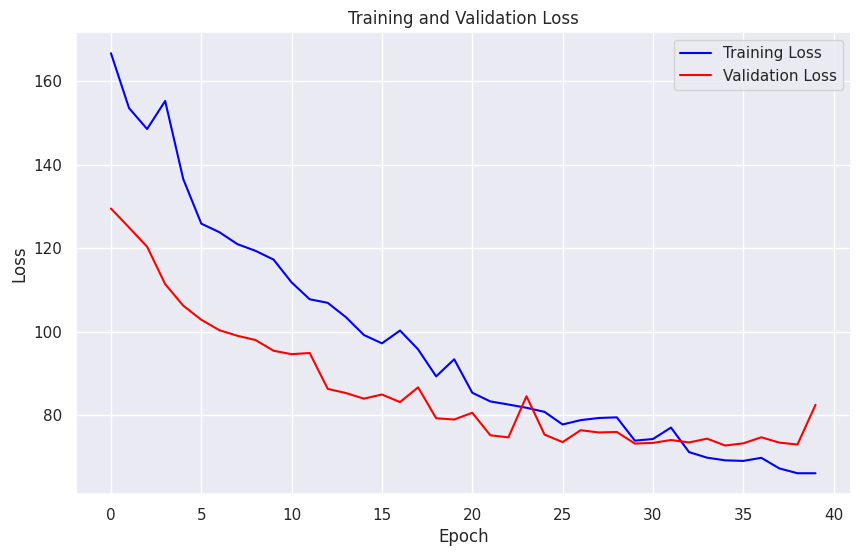

In [54]:
cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2)

# Extract loss and validation loss from the history object
train_loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Inverse scaling of y_test
y_test1_inv = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Predict on test set
y_pred_test1 = model.predict(X_test1)

# Inverse scaling of y_pred_test
y_pred_test1_inv = scaler_y.inverse_transform(y_pred_test1.reshape(-1, 1)).flatten()

# Extract date from the 'datum' index
date_range1 = df_new1['datum'].iloc[split_index:].dt.date

# Create a DataFrame for actual and predicted values with date on x-axis
df_actual_predicted1 = pd.DataFrame({
    'Date': date_range1,
    'Actual': y_test1_inv,
    'Predicted': y_pred_test1_inv
})

# Plot actual vs predicted
plt.plot(df_actual_predicted1['Date'], df_actual_predicted1['Actual'], label='Actual')
plt.plot(df_actual_predicted1['Date'], df_actual_predicted1['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

NameError: name 'actual_values' is not defined

<Figure size 1000x600 with 0 Axes>

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 29, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        44,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,093 (176.14 KB)

 Trainable params: 45,093 (176.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 144.5117 - mae: 6.9639 - val_loss: 189.3086 - val_mae: 8.0047
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 146.2555 - mae: 6.8904 - val_loss: 186.3029 - val_mae: 8.3826
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 132.9460 - mae: 6.7074 - val_loss: 180.9769 - val_mae: 8.0049
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131.6437 - mae: 6.7558 - val_loss: 172.1150 - val_mae: 8.1156
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 117.7564 - mae: 6.7457 - val_loss: 165.7255 - val_mae: 7.9721
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.4351 - mae: 6.8697 - val_loss: 158.7375 - val_mae: 8.7104
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 117.2841 - mae: 7.0723 - val_loss: 154.5862 - val_mae: 8.1733
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.9383 - mae: 6.8935 - val_loss: 150.7999 - val_mae: 8.4852
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0

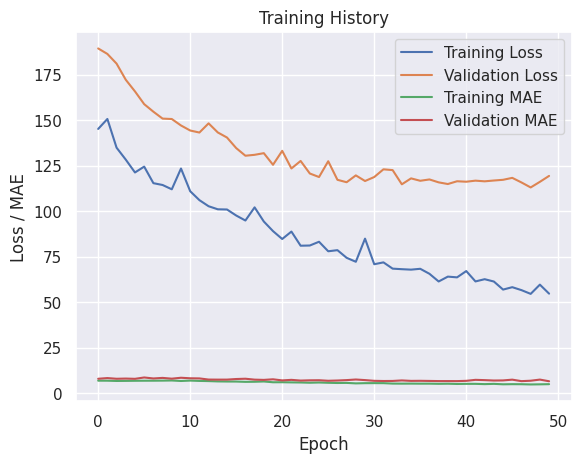

In [56]:
# 2 COMPLETE WITH GRAPH
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Assuming X_train_series and y_train are properly prepared

# Define the optimizer
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed

# Create a Sequential model
model_cnn = Sequential()

# Add Convolutional layers
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))

# Flatten the output before the Dense layers
model_cnn.add(Flatten())

# Add Dense layers
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))  # Output layer for regression

# Compile the model with Mean Squared Error loss and Adam optimizer
model_cnn.compile(loss='mse', optimizer=optimizer, metrics=['mae'])  # Using 'mae' as a metric

# Display the model summary
model_cnn.summary()

# Train the model
history = model_cnn.fit(X_train_series, Y_train, epochs=50, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size as needed

# Plot training history (loss and mean absolute error)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss / MAE')
plt.title('Training History')
plt.legend()
plt.show()


## CNN-LSTM

In [58]:
subsequences = 2
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (1444, 2, 15, 1)
Validation set shape (963, 2, 15, 1)


In [59]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Define optimizer with specified parameters (e.g., learning rate)
optimizer = Adam(learning_rate=0.001)

# Define and build the CNN-LSTM model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))

# Compile the model with the specified optimizer and loss function
model_cnn_lstm.compile(loss='mse', optimizer=optimizer)

# Display model summary
model_cnn_lstm.summary()

# Train the model
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Y_train, validation_data=(X_valid_series_sub, Y_valid), epochs=epochs, verbose=2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, None, 15, 64)   │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, None, 7, 64)    │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, None, 448)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        99,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,979 (390.54 KB)

 Trainable params: 99,979 (390.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
46/46 - 3s - 73ms/step - loss: 156.8933 - val_loss: 116.2614
Epoch 2/40
46/46 - 0s - 9ms/step - loss: 145.4611 - val_loss: 100.5227
Epoch 3/40
46/46 - 1s - 14ms/step - loss: 118.3074 - val_loss: 92.9982
Epoch 4/40
46/46 - 0s - 11ms/step - loss: 114.0123 - val_loss: 90.8753
Epoch 5/40
46/46 - 0s - 9ms/step - loss: 113.4231 - val_loss: 89.8894
Epoch 6/40
46/46 - 0s - 11ms/step - loss: 107.0096 - val_loss: 89.1439
Epoch 7/40
46/46 - 0s - 9ms/step - loss: 104.9229 - val_loss: 87.4661
Epoch 8/40
46/46 - 1s - 11ms/step - loss: 103.2601 - val_loss: 87.6706
Epoch 9/40
46/46 - 1s - 12ms/step - loss: 104.4118 - val_loss: 87.4584
Epoch 10/40
46/46 - 1s - 12ms/step - loss: 98.7133 - val_loss: 92.6034
Epoch 11/40
46/46 - 0s - 9ms/step - loss: 95.9892 - val_loss: 86.7937
Epoch 12/40
46/46 - 1s - 13ms/step - loss: 99.4584 - val_loss: 90.0114
Epoch 13/40
46/46 - 1s - 13ms/step - loss: 96.2654 - val_loss: 87.4227
Epoch 14/40
46/46 - 1s - 14ms/step - loss: 99.8612 - val_loss: 84.0593
Epoch 15

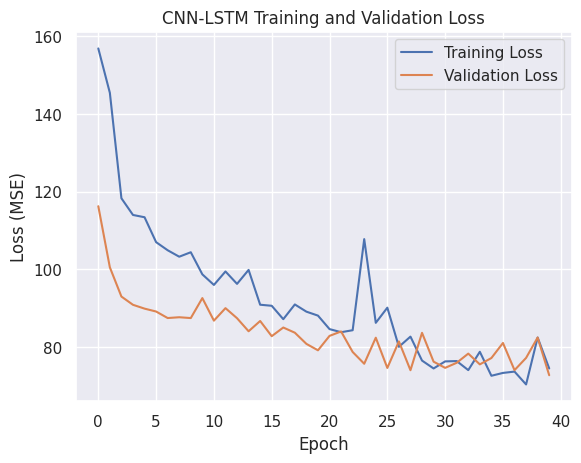

In [60]:
# Plot training history (loss)
plt.plot(cnn_lstm_history.history['loss'], label='Training Loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('CNN-LSTM Training and Validation Loss')
plt.legend()
plt.show()

### Comparing Models

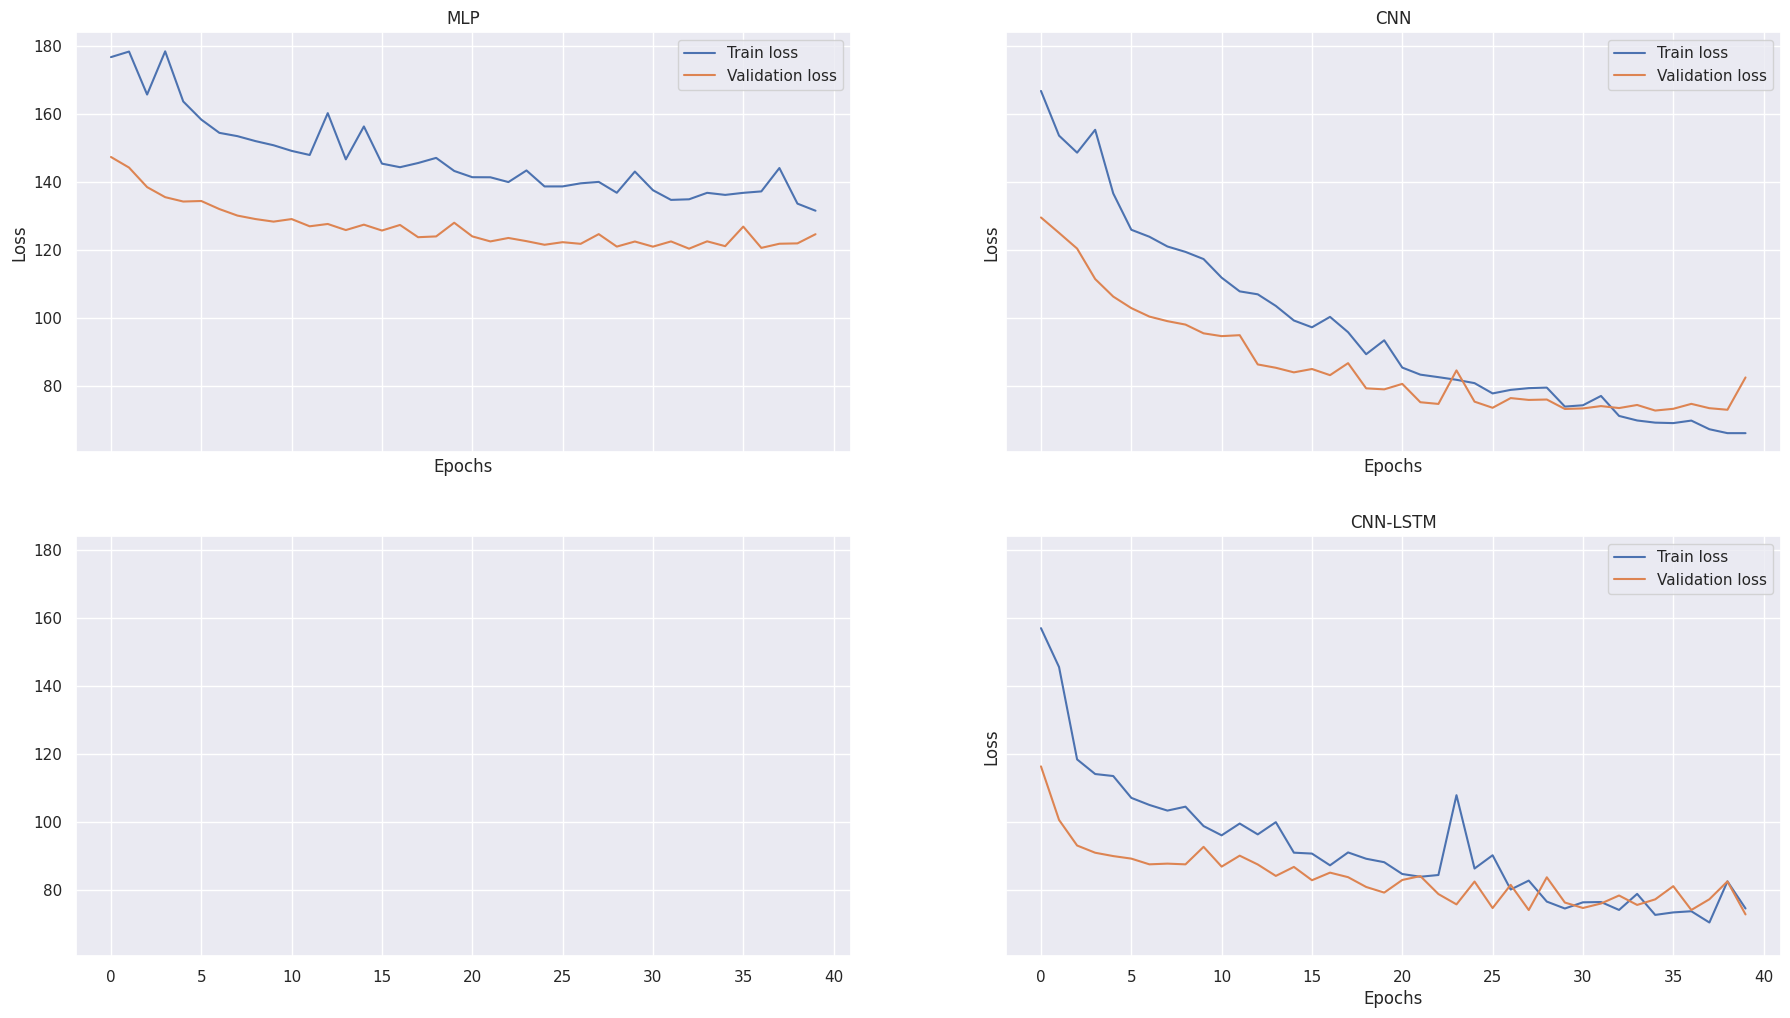

In [76]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(mlp_history.history['loss'], label='Train loss')
ax1.plot(mlp_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.plot(cnn_history.history['val_loss'], label='Validation loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')


ax4.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax4.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
ax4.legend(loc='best')
ax4.set_title('CNN-LSTM')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')

plt.show()

## RMSE Values

In [62]:

mlp_train_pred = model_mlp.predict(X_train.values)
mlp_valid_pred = model_mlp.predict(X_valid.values)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, mlp_valid_pred)))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train rmse: 11.569602416338661
Validation rmse: 11.255335503014512


In [63]:

cnn_train_pred = model_cnn.predict(X_train_series)
cnn_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse: 8.36903746393385
Validation rmse: 9.110569369301846


In [64]:
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_valid_series_sub)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_lstm_valid_pred)))

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train rmse: 8.221777316782058
Validation rmse: 8.6157250537814


## aisehi 

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title("Training and Validation Loss")
epoch = range(len(cnn_history.history['loss']))
plt.figure()
plt.show()

In [ ]:
cnn_train_pred = model_cnn.predict(X_trained)
cnn_valid_pred = model_cnn.predict(X_tested)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_test, cnn_valid_pred)))

In [ ]:
from sklearn.metrics import r2_score

y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))